### KNN based Collaborative Filtering
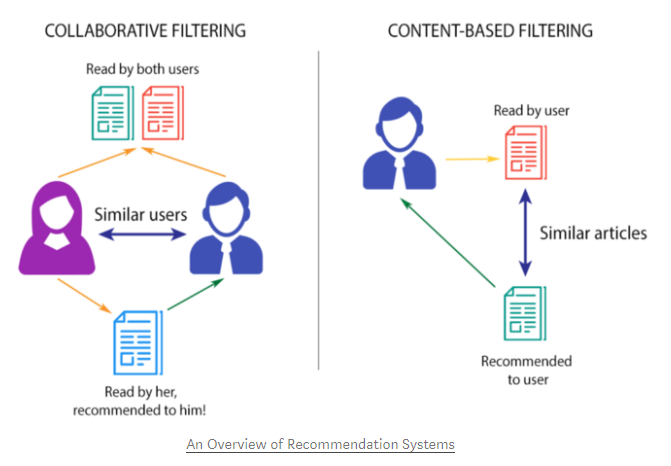
Source: https://towardsdatascience.com

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df = pd.merge(ratings,movies,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])

In [6]:
combine_movie_rating.shape

(100836, 6)

In [7]:
combine_movie_rating.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'totalRatingCount'})

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [8]:
# getting total number of rating on each movies
movie_ratingCount = (combine_movie_rating.groupby('title')['rating'].count()
                     .reset_index()
                     .rename(columns={'rating':'totalRatingCount'})
                     [['title','totalRatingCount']])
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [9]:
# merging above table with combined_movie_rating i.e. df with dropNA
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on='title', right_on='title', how='left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,timestamp,title,genres,totalRatingCount
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215


In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [11]:
# many movies has less rating which cant be used for recommendation, so removing movies wich has less than 50 rating
popularity_threshold = 50
rating_popular_movie = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,timestamp,title,genres,totalRatingCount
0,1,1,4.000,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.000,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.500,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.500,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.500,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215


In [12]:
rating_popular_movie.shape

(41362, 7)

In [13]:
df.shape

(100836, 6)

In [14]:
# creating a pivot table
movie_feature_df = rating_popular_movie.pivot_table(values='rating', index='title', columns='userId').fillna(0)
movie_feature_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


In [15]:
# above we got pivot table, we'll convert it to array matrix using below code
from scipy.sparse import csr_matrix
movie_feature_df_matrix = csr_matrix(movie_feature_df)

In [16]:
#using KNN
from sklearn.neighbors import NearestNeighbors

In [17]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

In [18]:
model_knn.fit(movie_feature_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
query_index = np.random.choice(movie_feature_df.shape[0])
query_index
# 307 = Pirates of the Caribbean: Dead Man's Chest (2006)

247

In [20]:
movie_feature_df.iloc[query_index,:].values.reshape(1, -1)

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 3. , 0. , 0. , 0. , 4. , 5. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. ,
        0. , 0. , 5. , 0. , 0. , 5. , 0. , 0. , 4.5, 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 5. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 5. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. ,
        0. , 0. , 0. , 0. , 0. , 3. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3. , 0. ,
        0. , 0. , 5. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. ,
        0. , 0. , 0. , 0. , 0. , 3.5, 0. , 0. , 0. 

In [21]:
model_knn.kneighbors(movie_feature_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors=6)

(array([[0.        , 0.41352816, 0.41804254, 0.43533049, 0.43992113,
         0.45904386]]),
 array([[247, 438, 228, 364, 259, 237]], dtype=int64))

In [22]:
distances, indices = model_knn.kneighbors(movie_feature_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors=6)

In [23]:
for i in range(0, len(distances.flatten())):
    if i==0:
        print(f"Recommendation for {movie_feature_df.index[query_index]} are:\n")
    else:
        print(f"{i}. {movie_feature_df.index[indices.flatten()[i]]}")

Recommendation for Little Mermaid, The (1989) are:

1. Who Framed Roger Rabbit? (1988)
2. Jungle Book, The (1967)
3. Snow White and the Seven Dwarfs (1937)
4. Mary Poppins (1964)
5. Lady and the Tramp (1955)


In [24]:
def recommend(movie):
    model_knn.kneighbors(movie_feature_df.iloc[movie,:].values.reshape(1, -1), n_neighbors=6)
    distances, indices = model_knn.kneighbors(movie_feature_df.iloc[movie,:].values.reshape(1, -1), n_neighbors=6)
    for i in range(0, len(distances.flatten())):
        if i==0:
            print(f"Recommendation for {movie_feature_df.index[movie]} are:\n")
        else:
            print(f"{i}. {movie_feature_df.index[indices.flatten()[i]]}")

In [25]:
##movie = int(input('Enter Movie Id(between 0-405): '))
#print(movie_feature_df.index[movie])
movie= int(307)
recommend(movie)

Recommendation for Pirates of the Caribbean: Dead Man's Chest (2006) are:

1. Pirates of the Caribbean: At World's End (2007)
2. Pirates of the Caribbean: The Curse of the Black Pearl (2003)
3. Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)
4. Harry Potter and the Goblet of Fire (2005)
5. Charlie and the Chocolate Factory (2005)


In [26]:
import pickle

In [27]:
#movie_feature_df.index

In [28]:
#pickle.dump(model_knn,open('model.pkl','wb'))

In [29]:
movie_feature_df.to_csv('pivot_table.csv')